# **Data Wrangling - Data Preprocessing**
The "House Prices" Dataset, the features' descriptions can be checked [in this link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [ ]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/MyDrive/Colab Notebooks/Data Wrangling/Week 8/'

df = pd.read_csv(PATH+'train.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Check the features count in the DataFrame
print("Total features in the DataFrame df are:",len(df.columns.values))

Total features in the DataFrame df are: 81


In [ ]:
# Check the DataFrame information
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


From the information shown above, we can get a general insight into the DataFrame.


It has 81 features, which consist of 38 features that contain the numerical values, and the rest 43 features contain the categorical values.






#1. Null Values Evaluation

Next step we check the null values in the DataFrame, let's dig into its detail with the code below: 

In [ ]:
# Create the count of null values in each feature, resulting in series 
total_null = df.isna().sum().sort_values(ascending = False) 

# Create the percentage of null values compared to total rows in each feature, resulting in series
percentage_null = ((total_null/df.isna().count()*100).sort_values(ascending = False))

# Integrate the null values information, resulting in DataFrame
missing_data = pd.concat([total_null, percentage_null], axis = 1, keys = ['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


From the DataFrame above, we know that the columns `PoolQC, MiscFeature, Alley, Fence, and FireplaceQu` **have more than 40% of null values**, too  much effort to cross-check and it will be not reliable to impute values into it, thus I decide to drop those columns.

In [ ]:
columns_to_be_deleted = missing_data.loc[(missing_data.Percentage > 40)] # Select the target features to be deleted
columns_to_be_deleted = columns_to_be_deleted.index.values.tolist() # Convert the features into the list
columns_to_be_deleted

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [ ]:
# Drop the features with >40% null values
df = df.drop(columns_to_be_deleted, axis=1)
missing_data = missing_data.drop(columns_to_be_deleted)

In [ ]:
# Recheck the current features count in the DataFrame
print("Total features in the DataFrame df currently are:",len(df.columns.values))

Total features in the DataFrame df currently are: 76


In [ ]:
# Recheck the current missing_data DataFrame
missing_data.head(20)

,Total,Percentage
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


We still have features containing a minor percentage of null values, those features cannot be simply dropped.

Now we focus on those features.

In [ ]:
missing_columns = missing_data.loc[(missing_data.Percentage > 0)] # Select the features containing null values
missing_columns = missing_columns.index.values.tolist() # Convert the features into the list
missing_columns

['LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

Now we have the list data for the features containing null values.

We need to inspect its distribution before deciding on treatments for the null values.

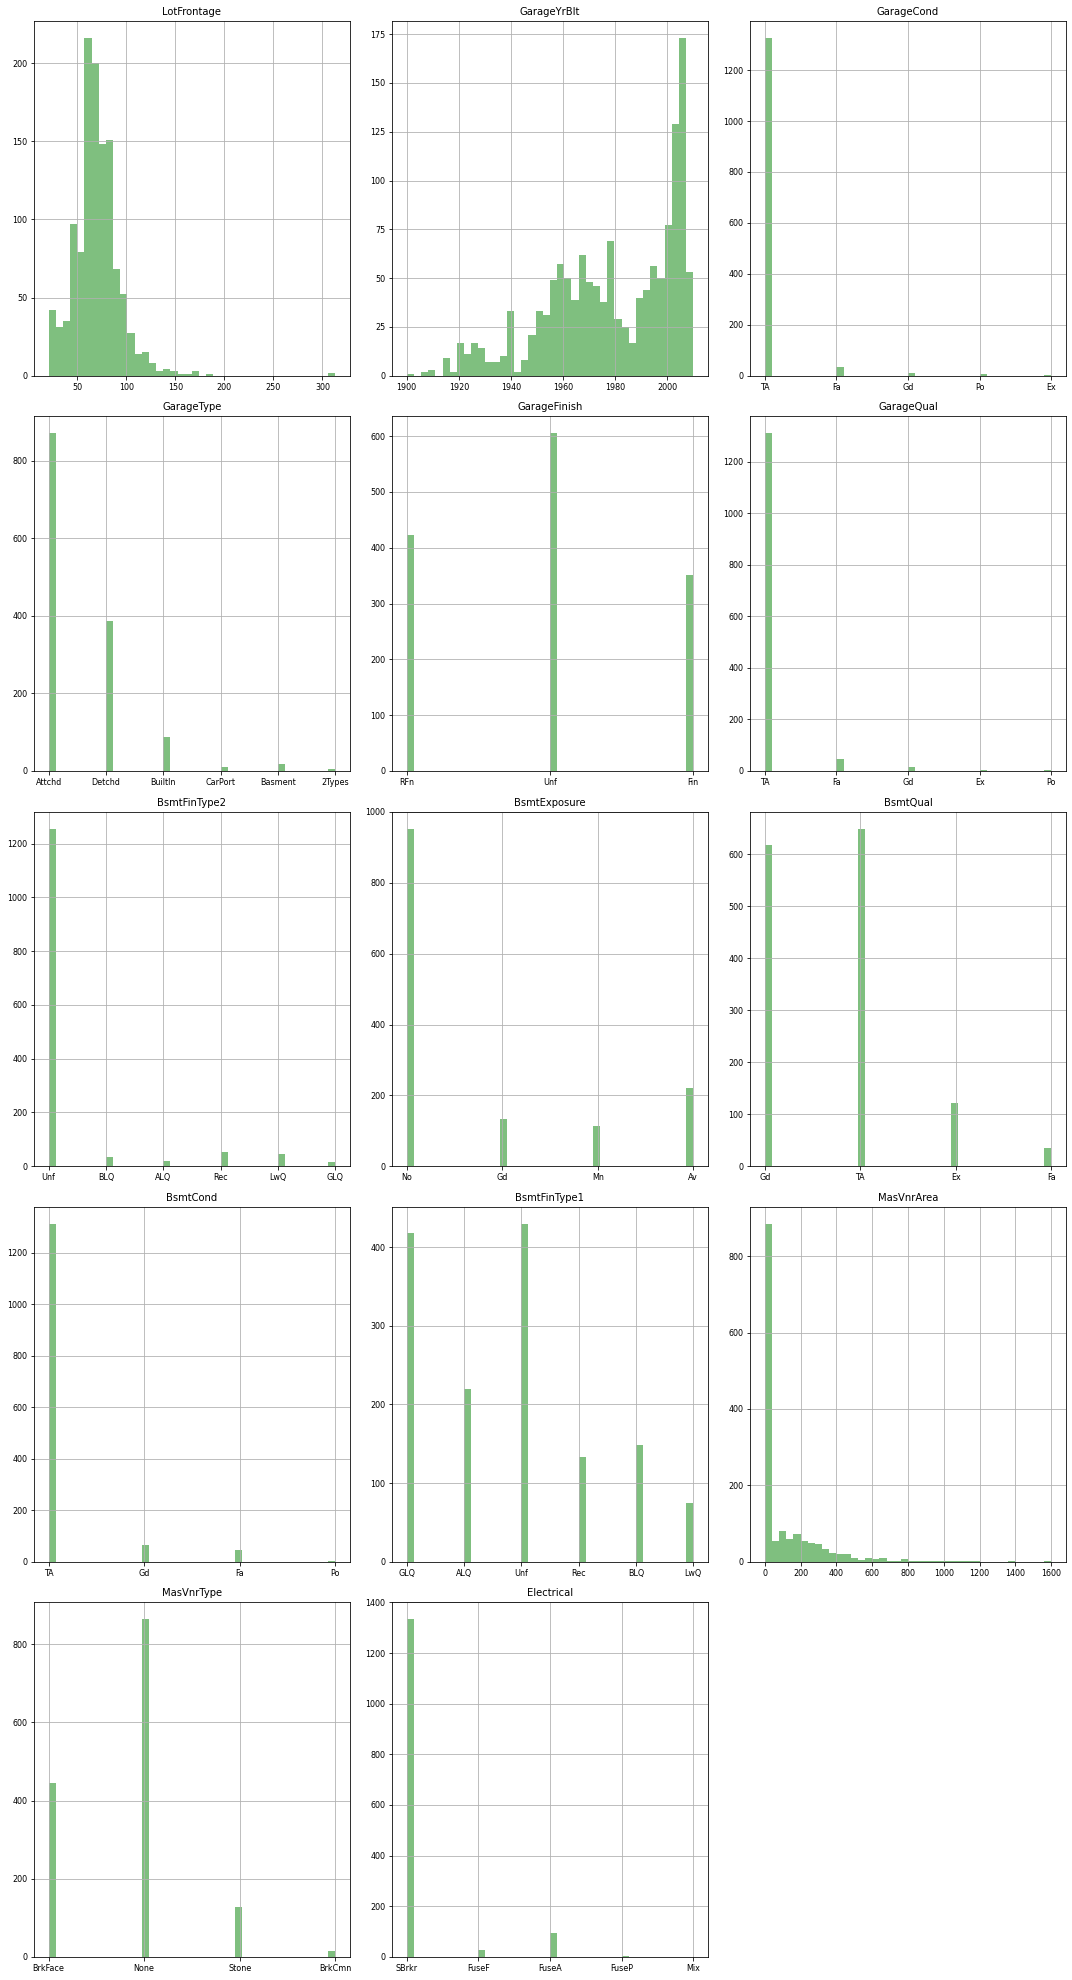

In [ ]:
# Visualize the missing_columns to comprehend its distribution
from collections import Counter

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        try:
            df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (15, 30))
        except:
            cnt = Counter(df[var_name])
            cnt.hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (8, 24))
        ax.set_title(var_name, fontsize = 10)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

draw_histograms(df, missing_columns, 5, 3)

From the graph above, firstly I divide those features into two types i.e. numerical and categorical data. 

The numerical ones are: `LotFrontage, GarageYrBlt, and MasVnrArea`. 

The rest features are categorized as categorical data. 

In [ ]:
# Creating the list of numerical values
num_list = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
num_list

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [ ]:
# Creating the list of categorical values
cat_list = [x for x in missing_columns if x not in num_list]
cat_list

['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'Electrical']

Now we have 2 list of data types.


For those features, I decided to treat them by imputing the values into them.

For the numerical data, the imputation method I choose to eliminate the null values is the **(rounded) mean value**.

In [ ]:
# Impute the null values in numerical data with its mean value
for num_name in num_list:
  df[num_name].fillna(round(df[num_name].mean()), inplace=True)

And for the categorical data, I use the **mode value**.

In [ ]:
# Impute the null values in categorical data with its mode value
for cat_name in cat_list:
  df[cat_name].fillna(df[cat_name].mode()[0], inplace=True)

In [ ]:
# Recheck the current null values ocurrence
print("Total of null values that occurred in the DataFrame df are:", df.isna().sum().sum())

Total of null values that occurred in the DataFrame df are: 0


Now the DataFrame `df` no longer contains any null values.

# 2. Table Separation for Numerical and Categorical Data.

Now we move on to explore deeper into the DataFrame `df`.

First of all, we divide the data into numerical and categorical data.

In [ ]:
# Create the numerical data DataFrame
numerical_columns = df._get_numeric_data().columns
numerical_df = df[numerical_columns]
numerical_df = numerical_df.reindex(sorted(numerical_df.columns), axis=1) # Sort the features by name order alphabetically

# Set the 'Id' feature as an index
numerical_df.set_index(['Id'], inplace=True)
numerical_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706,0,1,0,150,0,...,7,0,208500,0,8,856,0,2003,2003,2008
2,1262,0,0,3,978,0,0,1,284,0,...,6,0,181500,0,6,1262,298,1976,1976,2007
3,920,866,0,3,486,0,1,0,434,0,...,7,0,223500,0,6,920,0,2001,2002,2008
4,961,756,0,3,216,0,1,0,540,272,...,7,0,140000,0,7,756,0,1915,1970,2006
5,1145,1053,0,4,655,0,1,0,490,0,...,8,0,250000,0,9,1145,192,2000,2000,2008


The feature `"Id"` has to be converted to be the index, so it will not interfere with the analysis, because it is also a numerical but only shows the order of data.

In [ ]:
# Create the categorical data DataFrame
categorical_df = df.drop(numerical_columns, axis=1)
categorical_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## 2.1 Numerical Data Exploratory Analysis


Let's explore **the numerical data** first.

Starting with checking the basic information of its feature to get a general comprehension.

In [ ]:
# Check the DataFrame information
numerical_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 37 entries, 1stFlrSF to YrSold
dtypes: float64(3), int64(34)
memory usage: 433.4 KB


In [ ]:
# Recheck the null values ocurrence
print("Total of null values that occurred in the DataFrame numerical_df are:", numerical_df.isna().sum().sum())

Total of null values that occurred in the DataFrame numerical_df are: 0


We are now ready to explore deeper into 37 features in the `numerical_df`, that do not consist of any null values.

### 2.1.1 Dropping the irrelevant features.

In [ ]:
# Print the DataFrame information for assistance
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   int64  
 2   3SsnPorch      1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtFullBath   1460 non-null   int64  
 7   BsmtHalfBath   1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   EnclosedPorch  1460 non-null   int64  
 10  Fireplaces     1460 non-null   int64  
 11  FullBath       1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  GarageCars     1460 non-null   int64  
 14  GarageYrBlt    1460 non-null   float64
 15  GrLivArea      1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  LotArea 

I evaluate some of the features that have low relevance to the house's general condition for customers' assessments, those features are related to the basement secondary condition, thus I decide to drop them.

The feature `TotalBsmtSF` still needs to be  kept because it shows the primary condition of the basement occurrence in the house.

In [ ]:
# Select the group of secondary basement features
basements = numerical_df.iloc[:,4:9]

# Drop the features
numerical_df.drop(basements, inplace = True, axis = 1)
numerical_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,0,0,2,548,2,2003.0,...,7,0,208500,0,8,856,0,2003,2003,2008
2,1262,0,0,3,0,1,2,460,2,1976.0,...,6,0,181500,0,6,1262,298,1976,1976,2007
3,920,866,0,3,0,1,2,608,2,2001.0,...,7,0,223500,0,6,920,0,2001,2002,2008
4,961,756,0,3,272,1,1,642,3,1998.0,...,7,0,140000,0,7,756,0,1915,1970,2006
5,1145,1053,0,4,0,1,2,836,3,2000.0,...,8,0,250000,0,9,1145,192,2000,2000,2008


### 2.1.2 Renaming features.

There are several features that are related to the porches type, unfortunately, the column position is scattered in the DataFrame `df`.

I decided to rename them to make them ordered consecutively on the table, so it can be easier to comprehend the house condition.

In [ ]:
# Rename the porches type
numerical_df.rename(columns={"3SsnPorch": "Porch3SeasonSF", "EnclosedPorch": "PorchEnclosedSF", "OpenPorchSF": "PorchOpenSF", "ScreenPorch": "PorchScreenSF"}, inplace = True)

# Sort the features by name order alphabetically
numerical_df = numerical_df.reindex(sorted(numerical_df.columns), axis=1) 

In [ ]:
# Create an assist DataFrame for the porches type features
porches = numerical_df[["Porch3SeasonSF", "PorchEnclosedSF", "PorchOpenSF", "PorchScreenSF"]]

# Create an example DataFrame for porches type comparison
porch_compare = pd.concat([numerical_df[["LotArea"]], porches, numerical_df[["SalePrice"]]], axis = 1)
porch_compare.head(13)

,LotArea,Porch3SeasonSF,PorchEnclosedSF,PorchOpenSF,PorchScreenSF,SalePrice
Id,,,,,,
1,8450,0,0,61,0,208500
2,9600,0,0,0,0,181500
3,11250,0,0,42,0,223500
4,9550,0,272,35,0,140000
5,14260,0,0,84,0,250000
6,14115,320,0,30,0,143000
7,10084,0,0,57,0,307000
8,10382,0,228,204,0,200000
9,6120,0,205,0,0,129900


The table above is an example of how the porches type can be easier to compare while assessing the houses.




Since the features that refer to area closure in porches type are renamed with the suffix "-SF", the rest of the area closure features also get a similar treatment. 

In [ ]:
# Rename the area closure features
numerical_df.rename(columns={"GarageArea": "GarageAreaSF", "GrLivArea": "GrLivAreaSF", "LotArea": "LotAreaSF", "LotFrontage": "LotFrontageFeet"
                             , "MasVnrArea": "MasVnrAreaSF", "PoolArea": "PoolAreaSF"}, inplace = True)

Now all the features are already named properly.

### 2.1.3. Consolidating and conforming features.

The bathroom is an essential feature to be present in a house.

While I explore the bathroom feature, I realise that on DataFrame `numerical_df` the bathroom feature also exists in the features related to the basement, which already dropped before.

Thus I need to recover them.

In [ ]:
# Select the features for bathroom in the basement
bathroom_basement = basements[['BsmtFullBath', 'BsmtHalfBath']]

# Recover the bath_room_basement to numerical_df
numerical_df = numerical_df.join(bathroom_basement)
numerical_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,Fireplaces,FullBath,GarageAreaSF,GarageCars,GarageYrBlt,GrLivAreaSF,HalfBath,...,PorchScreenSF,SalePrice,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,3,0,2,548,2,2003.0,1710,1,...,0,208500,8,856,0,2003,2003,2008,1,0
2,1262,0,3,1,2,460,2,1976.0,1262,0,...,0,181500,6,1262,298,1976,1976,2007,0,1
3,920,866,3,1,2,608,2,2001.0,1786,1,...,0,223500,6,920,0,2001,2002,2008,1,0
4,961,756,3,1,1,642,3,1998.0,1717,0,...,0,140000,7,756,0,1915,1970,2006,1,0
5,1145,1053,4,1,2,836,3,2000.0,2198,1,...,0,250000,9,1145,192,2000,2000,2008,1,0


In [ ]:
# Check the bathroom features
numerical_df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
Id,,,,
1,1,0,2,1
2,0,1,2,0
3,1,0,2,1
4,1,0,1,0
5,1,0,2,1


We can understand that the bathroom features are categorized by type (Half Bathroom and Full Bathroom), and by location (in the basement and on the ground).

To simplify, I decide to categorize them by type only, thus I summarize the value in the feature `BsmtFullBath` with `FullBath` and `BsmtHalfBath` with `HalfBath`. 

In [ ]:
# Features summation process

numerical_df['FullBath'] = numerical_df[['FullBath', 'BsmtFullBath']].sum(axis = 1)
numerical_df['HalfBath'] = numerical_df[['HalfBath', 'BsmtHalfBath']].sum(axis = 1)

numerical_df.drop(bathroom_basement, inplace = True, axis = 1) # Drop the bathroom_basement features
numerical_df.rename(columns={"FullBath": "BathroomFullTotal", "HalfBath": "BathroomHalfTotal"}, inplace = True) # Rename the features with the addition of the description "total"
numerical_df = numerical_df.reindex(sorted(numerical_df.columns), axis=1) # Sort the features by name order alphabetically

numerical_df[['BathroomFullTotal', 'BathroomHalfTotal']].head() # Check the bathroom features

,BathroomFullTotal,BathroomHalfTotal
Id,,
1,3,1
2,2,1
3,3,1
4,2,0
5,3,1


The information for the bathroom in the houses is now more simple.

There are also some features that I guess are related to each other, i.e: `GrLivAreaSF`, `1stFlrSF `, and `2ndFlrSF `.

Those features show the living area in the house.

In [ ]:
# Check the living area features
numerical_df[['GrLivAreaSF', '1stFlrSF', '2ndFlrSF']].head()

,GrLivAreaSF,1stFlrSF,2ndFlrSF
Id,,,
1,1710,856,854
2,1262,1262,0
3,1786,920,866
4,1717,961,756
5,2198,1145,1053


It is clearly seen that feature `GrLivAreaSF` is the sum of features `1stFlrSF ` and `2ndFlrSF `.

I decided to rename them so the data can be easier to understand.

In [ ]:
# Rename the living area features
numerical_df.rename(columns={"GrLivAreaSF": "LivingAreaTotalSF", "1stFlrSF": "LivingArea1stFlrSF", "2ndFlrSF": "LivingArea2ndFlrSF", "TotalBsmtSF": "BsmtTotalSF"}, inplace = True) 

The basement is also considered the area inside the building, although it is not generally used as a "living area", thus I make a new feature named "building area" that is the sum of the living area and basement area.

This feature will help user to assess and compare the house price.

In [ ]:
# Create a new feature by summing the existing features
numerical_df['BuildingAreaTotalSF'] = numerical_df[['LivingAreaTotalSF', 'BsmtTotalSF']].sum(axis = 1)


Using a similar intuition with the living area, let's check for features `TotRmsAbvGrd` and `Bedroom`.


-   `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms).
-   `Bedroom`: Number of bedrooms above basement level.






In [ ]:
# Check the number of rooms feature
numerical_df[['TotRmsAbvGrd', 'BedroomAbvGr']].head()

,TotRmsAbvGrd,BedroomAbvGr
Id,,
1,8,3
2,6,3
3,6,3
4,7,3
5,9,4


I conclude that the difference between those two features can be identified as "other rooms".

In [ ]:
# Create a new feature, OtherRooms
numerical_df['OtherRooms'] = numerical_df['TotRmsAbvGrd'] - numerical_df['BedroomAbvGr']

# Rename the bedroom feature
numerical_df.rename(columns={"BedroomAbvGr": "Bedrooms"}, inplace = True)

# Drop the TotRmsAbvGrd feature
numerical_df.drop(['TotRmsAbvGrd'], inplace = True, axis = 1)

In [ ]:
# Create assist DataFrames
yearbuilt = numerical_df[["YearBuilt", "YearRemodAdd"]]
area = numerical_df[["LotAreaSF", "BuildingAreaTotalSF", "LivingAreaTotalSF", "LivingArea1stFlrSF", "LivingArea2ndFlrSF", "BsmtTotalSF"]]
rooms = numerical_df[["Bedrooms", "BathroomFullTotal", "BathroomHalfTotal", "OtherRooms", "GarageCars"]]


# Create an example DataFrame for basic features information
basic_info = pd.concat([yearbuilt, area, rooms, numerical_df[["SalePrice"]]], axis = 1)
basic_info.head()

,YearBuilt,YearRemodAdd,LotAreaSF,BuildingAreaTotalSF,LivingAreaTotalSF,LivingArea1stFlrSF,LivingArea2ndFlrSF,BsmtTotalSF,Bedrooms,BathroomFullTotal,BathroomHalfTotal,OtherRooms,GarageCars,SalePrice
Id,,,,,,,,,,,,,,
1,2003,2003,8450,2566,1710,856,854,856,3,3,1,5,2,208500
2,1976,1976,9600,2524,1262,1262,0,1262,3,2,1,3,2,181500
3,2001,2002,11250,2706,1786,920,866,920,3,3,1,3,2,223500
4,1915,1970,9550,2473,1717,961,756,756,3,2,0,4,3,140000
5,2000,2000,14260,3343,2198,1145,1053,1145,4,3,1,5,3,250000


The table above is an example of how to compare the basic informations while assessing the houses.




### 2.1.4. Zero values evaluation.

For further exploration of the `numerical_df`, let's inspect its data distribution.

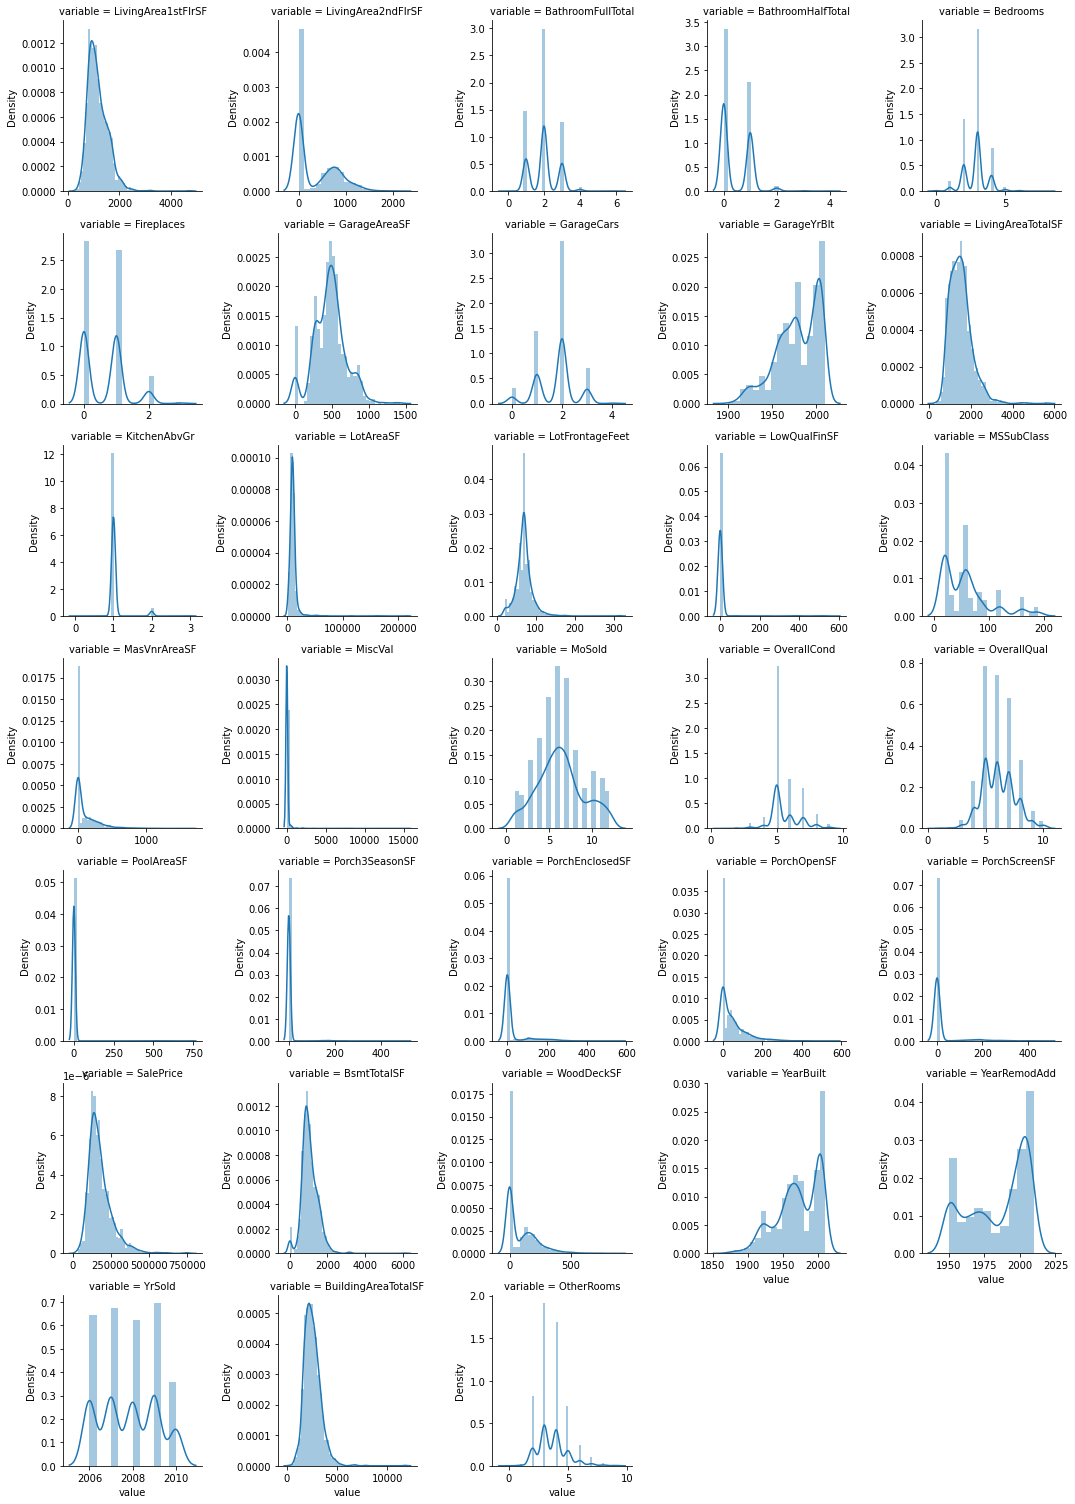

In [ ]:
# Distplot the entire features in the numerical_df to inspect the data distribution

f = pd.melt(numerical_df, value_vars=numerical_df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

There are some features that shaped extremely right-skewed with a high frequency of 0 (zero) value.

Those features are:


*   LowQualFinSF: Low quality finished square feet (all floors)
*   MasVnrAreaSF: Masonry veneer area in square feet
*   WoodDeckSF: Wood deck area in square feet
*   PoolAreaSF: Pool area in square feet





In [ ]:
# Calculate the zero values percentage

columns = ['LowQualFinSF', 'MasVnrAreaSF', 'WoodDeckSF', 'PoolAreaSF']
zeros = [len(numerical_df[numerical_df[x] == 0]) for x in  columns] # Count the zero values in certain columns
rows = len(numerical_df.index) # Row count

def percentage(a):
   return a / rows * 100
pct = list(map(percentage, zeros)) # Count the zero values percentage in certain columns

dict = {'feature': columns, 'percentage of zeros': pct} # Integrate the percentage of zero values, resulting in DataFrame
zeros_df = pd.DataFrame(dict)
zeros_df

,feature,percentage of zeros
0,LowQualFinSF,98.219178
1,MasVnrAreaSF,58.972603
2,WoodDeckSF,52.123288
3,PoolAreaSF,99.520548


First, we analyze feature `LowQualFinSF`, which is the zero values percentage is 98% thus we conclude that most houses listed do not have any low-quality finished area.

In other words, all the houses are well built and finished.

So I confidently drop this feature because it gives irrelevant information.


In [ ]:
# Drop the LowQualFinSF feature
numerical_df.drop(['LowQualFinSF'], inplace = True, axis = 1)

### 2.1.5. Converting features' data types.

Masonry veneer, wood deck, and the pool are the supplementary features in the house that do not need the size of their occurrence in the house, thus I decide to convert them into the dichotomous value of "Yes" or "No". 

"No" represents the zero value on those features, while "Yes" represents the value that is more than zero.

In [ ]:
# Create a list for selected columns
selected_cols = ['MasVnrAreaSF', 'WoodDeckSF', 'PoolAreaSF']

# Check the features value before conversion
numerical_df[selected_cols].head()

,MasVnrAreaSF,WoodDeckSF,PoolAreaSF
Id,,,
1,196.0,0,0
2,0.0,298,0
3,162.0,0,0
4,0.0,0,0
5,350.0,192,0


In [ ]:
# Check the data type before conversion
numerical_df[selected_cols].dtypes

MasVnrAreaSF    float64
WoodDeckSF        int64
PoolAreaSF        int64
dtype: object

The first step, convert the float and integers into boolean values,  the zeros converted into "False" and the non-zeros will turn into "True".

In [ ]:
# Convert the integers into boolean 
numerical_df[selected_cols] = numerical_df[selected_cols].astype(bool)
numerical_df[selected_cols].head()

,MasVnrAreaSF,WoodDeckSF,PoolAreaSF
Id,,,
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,False
5,True,True,False


In [ ]:
# Check the data type after the first conversion 
numerical_df[selected_cols].dtypes

MasVnrAreaSF    bool
WoodDeckSF      bool
PoolAreaSF      bool
dtype: object

The second step, convert the boolean values into "Yes/No" sring.

In [ ]:
# Convert the booleans into "Yes/No" string

binary_dict = {True:'Y', False:'N'} # Create the assist dictionary for the values replacement
numerical_df.replace({'MasVnrAreaSF':binary_dict, 'WoodDeckSF':binary_dict, 'PoolAreaSF':binary_dict}, 
                       inplace=True)
numerical_df[selected_cols].head()

,MasVnrAreaSF,WoodDeckSF,PoolAreaSF
Id,,,
1,Y,N,N
2,N,Y,N
3,Y,N,N
4,N,N,N
5,Y,Y,N


In [ ]:
# Check the data type after the second  conversion
numerical_df[selected_cols].dtypes

MasVnrAreaSF    object
WoodDeckSF      object
PoolAreaSF      object
dtype: object

In [ ]:
# Rename the features
numerical_df.rename(columns={"MasVnrAreaSF": "MasonryVnr", "WoodDeckSF": "WoodDeck", "PoolAreaSF": "Pool"}, inplace = True)

There are also some feature which are qualitative, can be identified as ordinal data.

Those features are:
*   `MSSubClass`: The building class
*   `OverallCond`: Overall condition rating
*   `OverallQual`: Overall material and finish quality






For the feature `MSSubClass`, I decided to keep it as it is.

I found a similarity in the features `OverallCond` and `OverallQual`, let's compare those features. 

Text(0.5, 0, 'Ditribution Comparison')

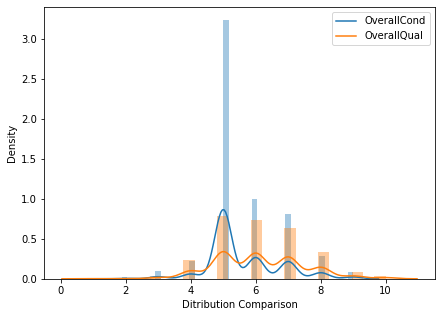

In [ ]:
# Compare two features by overlaying their plot

plt.figure(figsize=(7, 5))

sns.distplot(numerical_df['OverallCond'])
sns.distplot(numerical_df['OverallQual'])

plt.legend(['OverallCond', 'OverallQual'])
plt.xlabel('Ditribution Comparison')

From the plot above, we can clearly see the distribution of those features is pretty identical, with just a little difference in the frequency of mode value, thus I decide to drop one of them.

I choose to drop the feature `OverallQual`, assuming the "condition" shows the current situation while "quality" shows the situation right after the house is just built.

In [ ]:
# Drop the OverallQual feature
numerical_df.drop(['OverallQual'], inplace = True, axis = 1)

As I mentioned before, `MSSubClass` and `OverallCond` are identified as the ordinal data thus they need to be converted to the string data type.

In [ ]:
# Create a list for selected columns
selected_cols = ['MSSubClass', 'OverallCond']

# Convert the data type
numerical_df[selected_cols] = numerical_df[selected_cols].astype(object)

# Check the data type after the conversion
numerical_df[selected_cols].dtypes

MSSubClass     object
OverallCond    object
dtype: object

Now those features are already converted to string data type, thus they need to be moved to the DataFrame `categorical_df`.

In [ ]:
# Move the features to categorical_df

selected_cols = numerical_df[["MasonryVnr", "WoodDeck", "Pool", "MSSubClass", "OverallCond"]].reset_index()
selected_cols.drop(["Id"], inplace = True, axis = 1)
selected_cols # Create an assist DataFrame

numerical_df.drop(["MasonryVnr", "WoodDeck", "Pool", "MSSubClass", "OverallCond"], inplace = True, axis = 1) # Drop the features from numerical_df

categorical_df = categorical_df.join(selected_cols) # Join the selected features to categorical_df  

Up until these steps of data preprocessing, let's reinspect on the data distribution in `numerical_df`.


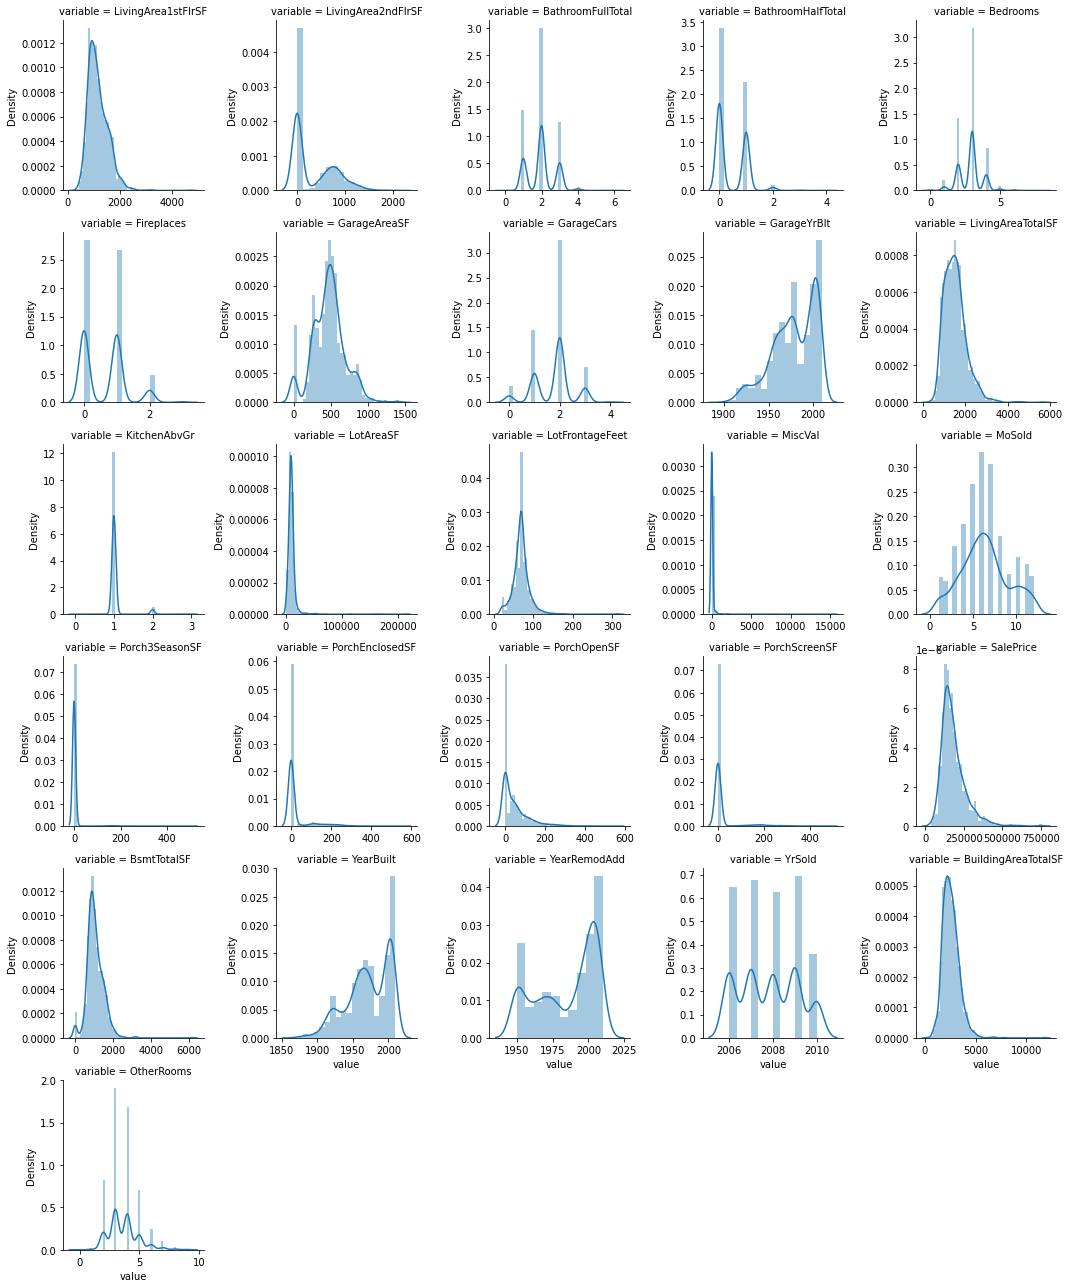

In [ ]:
# Distplot the entire features in the numerical_df to inspect the data distribution

f = pd.melt(numerical_df, value_vars=numerical_df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Let's take a look closer 
at the `SalePrice` distplot, since it is shaped extremely right-skewed, perhaps it has the outlier values.

Since the inspection of outliers in the house price feature is  a row-related evaluation instead of a column-related one, let's put the problem aside now and revisit after the merging of `numerical_df` and `categorical_df`.

## 2.3 Categorical Data Exploratory Analysis

We are now going to explore the `categorical_df`.

The features' descriptions can be checked [in this link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [ ]:
categorical_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MasonryVnr,WoodDeck,Pool,MSSubClass,OverallCond
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,TA,Y,WD,Normal,Y,N,N,60,5
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,TA,Y,WD,Normal,N,Y,N,20,8
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,TA,Y,WD,Normal,Y,N,N,60,5
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,TA,Y,WD,Abnorml,N,N,N,70,5
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,TA,Y,WD,Normal,Y,Y,N,60,5


In [ ]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

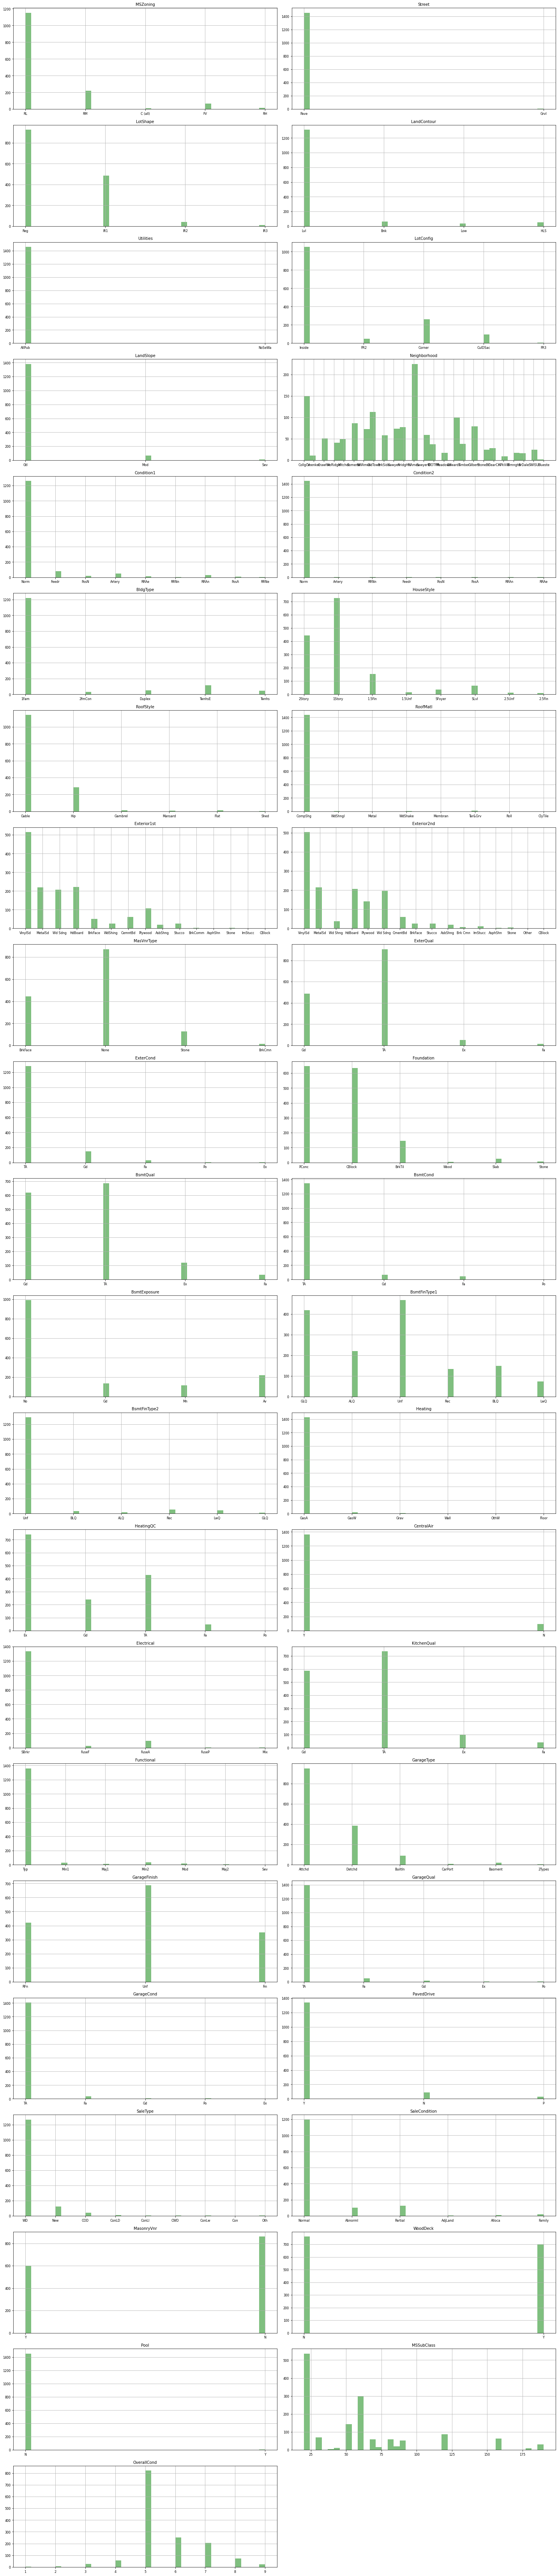

In [ ]:
# Distplot the entire features in the categorical_df to inspect the data distribution

from collections import Counter

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        try:
            categorical_df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (20, 100))
        except:
            cnt = Counter(df[var_name])
            cnt.hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (20, 100))
        ax.set_title(var_name, fontsize = 10)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

draw_histograms(df, categorical_df, 22, 2)

### 2.2.1. Renaming feature.

Starting with the most simple one, rename the masonry veneer type for feature naming consistency.

In [ ]:
# Rename the feature
categorical_df.rename(columns={"MasVnrType": "MasonryVnrType"}, inplace = True)

### 2.2.2. Extreme mode values evaluation.

Now let's evaluate the features that have an extreme mode value.

Those features are:


*   `Street`: Type of road access.
*   `LandContour`: Flatness of the property.


*   `Utilities`: Type of utilities available.
*   `LandSlope`: Slope of property.


*   `Condition2`: Proximity to main road or railroad (if a second is present).


*   `RoofMatl`: Roof material.
*   `Heating`: Type of heating.


*   `BsmtFinType2`: Quality of second finished area (if present).
*   `Functional`: Home functionality rating.


*   `GarageQual`: Garage quality.
*   `GarageCond`: Garage condition.













In [ ]:
# Calculate the mode values percentage

from statistics import mode # Import library

selected_cols = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'BsmtFinType2', 'Functional', 'GarageQual', 'GarageCond'] 
mode_names = [mode(categorical_df[x]) for x in  selected_cols] # Mode values in every feature in selected_cols
mode_count = [len(categorical_df[x][categorical_df[x] == mode(categorical_df[x])]) for x in  selected_cols] # Count of mode values in every feature in selected_cols
rows = len(categorical_df.index) # Row count

def percentage(a):
   return a / rows * 100
pct = list(map(percentage, mode_count)) # Count the percentage of mode values in certain columns

dict = {'Feature': selected_cols, 'Mode value': mode_names, 'Percentage of mode': pct} # Integrate the percentage of mode values, resulting in DataFrame
mode_df = pd.DataFrame(dict)
mode_df

,Feature,Mode value,Percentage of mode
0,Street,Pave,99.589041
1,LandContour,Lvl,89.794521
2,Utilities,AllPub,99.931507
3,LandSlope,Gtl,94.657534
4,Condition2,Norm,98.972603
5,RoofMatl,CompShg,98.219178
6,Heating,GasA,97.808219
7,BsmtFinType2,Unf,88.630137
8,Functional,Typ,93.150685
9,GarageQual,TA,95.342466


The table above shows the percentage of mode values in every feature that I mentioned before.

Assuming all of that values are dominant in certain features thus they become the typical standard for the houses that most consumers will not consider the value beside them in assessing the house.

For the heating feature for example, since almost 98% of the houses have the gas forced warm air furnaces (GasA), I assume that most consumers will not consider the other type of heating system in assessing the house they want to buy.

Those features can be dropped.

In [ ]:
# Drop the features containing extreme values
categorical_df.drop(categorical_df[selected_cols], inplace = True, axis = 1)

# 3. Merging DataFrames

The data cleansing process is almost finished, let's continue to merge the `numerical_df` and `categorical_df`.



In [ ]:
# Reset the index of numerical_df
numerical_df.reset_index(inplace = True)
numerical_df

# Concatenate the DataFrames
df_cleansed = pd.concat([numerical_df, categorical_df], axis=1)
df_cleansed.head()

,Id,LivingArea1stFlrSF,LivingArea2ndFlrSF,BathroomFullTotal,BathroomHalfTotal,Bedrooms,Fireplaces,GarageAreaSF,GarageCars,GarageYrBlt,...,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,MasonryVnr,WoodDeck,Pool,MSSubClass,OverallCond
0,1,856,854,3,1,3,0,548,2,2003.0,...,Attchd,RFn,Y,WD,Normal,Y,N,N,60,5
1,2,1262,0,2,1,3,1,460,2,1976.0,...,Attchd,RFn,Y,WD,Normal,N,Y,N,20,8
2,3,920,866,3,1,3,1,608,2,2001.0,...,Attchd,RFn,Y,WD,Normal,Y,N,N,60,5
3,4,961,756,2,0,3,1,642,3,1998.0,...,Detchd,Unf,Y,WD,Abnorml,N,N,N,70,5
4,5,1145,1053,3,1,4,1,836,3,2000.0,...,Attchd,RFn,Y,WD,Normal,Y,Y,N,60,5


In [ ]:
# Inspect the specification of the houses with pool
houses_with_pool = numerical_df.loc[categorical_df['Pool'] == "Yes"]
houses_with_pool


,Id,LivingArea1stFlrSF,LivingArea2ndFlrSF,BathroomFullTotal,BathroomHalfTotal,Bedrooms,Fireplaces,GarageAreaSF,GarageCars,GarageYrBlt,...,PorchEnclosedSF,PorchOpenSF,PorchScreenSF,SalePrice,BsmtTotalSF,YearBuilt,YearRemodAdd,YrSold,BuildingAreaTotalSF,OtherRooms


## 3.1. Outlier Evaluation in Sale Price 

Now we revisit the **outliers evaluation** that probably occurs in the feature `SalePrice`, the problem that I sparked before at point 2.1.5.

In [ ]:
# Create an assist series
price = df_cleansed['SalePrice']

# Print the descriptive statistics information of `SalePrice` feature
price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

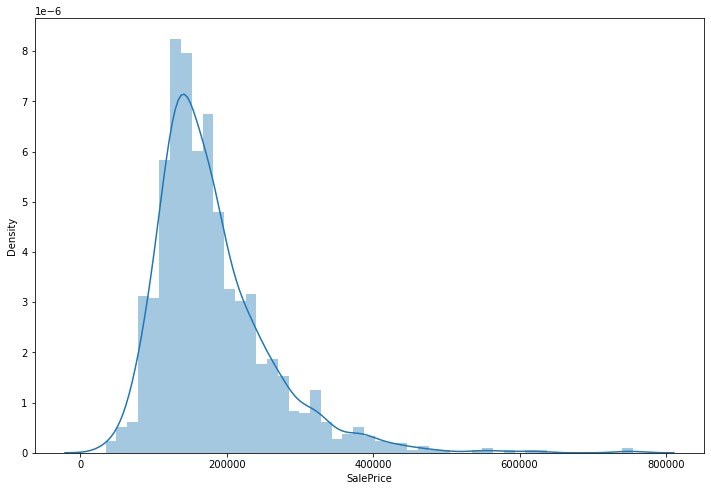

In [ ]:
# Print the bigger size of `SalePrice` distplot
plt.figure(figsize=(12,8))
sns.distplot(price)

From the plot above, for the outlier inspection, I roughly estimate the cut-off at $40,000.

Let's check the table for the houses priced at more than $40,000 to comprehend their condition.

In [ ]:
# Create assist DataFrames
yearbuilt = df_cleansed[["YearBuilt", "YearRemodAdd"]]
area = df_cleansed[["LotAreaSF", "BuildingAreaTotalSF", "LivingAreaTotalSF", "LivingArea1stFlrSF", "LivingArea2ndFlrSF", "BsmtTotalSF"]]
rooms = df_cleansed[["Bedrooms", "BathroomFullTotal", "BathroomHalfTotal", "OtherRooms"]]


# Create an example DataFrame for basic features information
basic_info = pd.concat([yearbuilt, area, rooms, price], axis = 1)
basic_info.head()

# Create the assist DataFrame for the houses >$40,000
outlier_inspection_by_price = basic_info.loc[price > 400000].sort_values('SalePrice')
outlier_inspection_by_price

,YearBuilt,YearRemodAdd,LotAreaSF,BuildingAreaTotalSF,LivingAreaTotalSF,LivingArea1stFlrSF,LivingArea2ndFlrSF,BsmtTotalSF,Bedrooms,BathroomFullTotal,BathroomHalfTotal,OtherRooms,SalePrice
661,1994,2005,46589,4077,2448,1686,762,1629,4,3,1,4,402000
515,2009,2009,12220,4026,2020,2020,0,2006,3,3,1,6,402861
231,1995,1996,15138,4256,2794,1490,1304,1462,4,3,1,5,403000
1353,1995,1996,14720,5271,3238,2053,1185,2033,4,3,1,5,410000
161,2003,2004,13688,4240,2668,1572,1096,1572,3,3,1,7,412500
278,2006,2007,14450,4242,2121,2121,0,2121,3,2,1,5,415298
664,2005,2006,20896,4174,2097,2097,0,2077,1,2,1,7,423000
1142,2006,2007,9965,4294,2828,1466,1362,1466,4,4,0,7,424870
389,2007,2008,12474,4014,2332,1742,590,1682,3,3,1,6,426000
496,1992,1993,12692,6428,3228,3228,0,3200,4,4,0,6,430000


From the table above, I assume that the most dominant feature related to the House Price Total is either the Total Building Area or the Lot Area, so I need to compare them in the regression plot.

Text(0, 0.5, 'LotAreaSF')

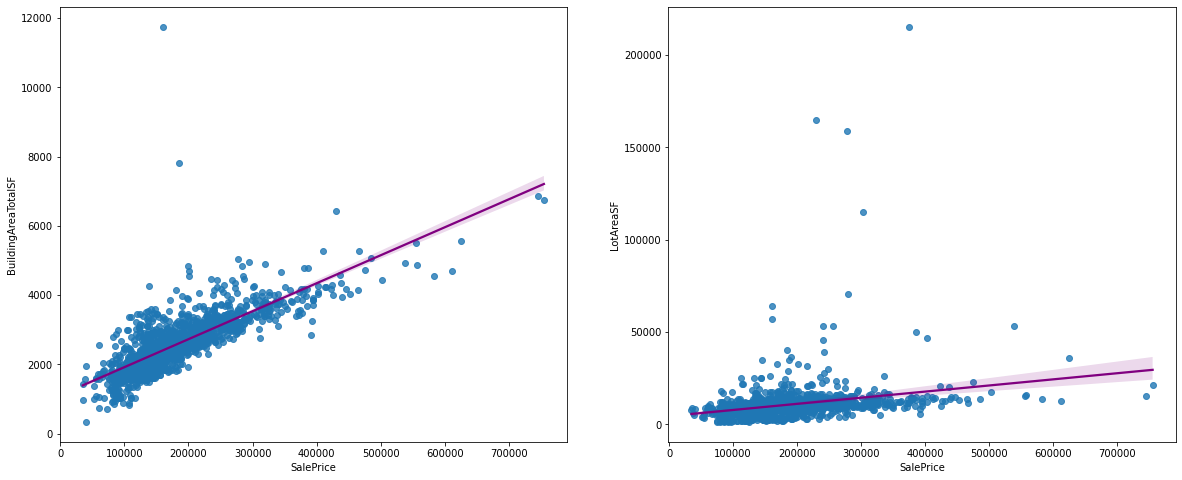

In [ ]:
# Check the comparison of relation between House Price to the Total Building Area and the Lot Area

fig, (ax1, ax2) = plt.subplots(figsize = (20, 8), ncols = 2,sharey = False) 

sns.regplot(x = price, y = df_cleansed['BuildingAreaTotalSF'], ax = ax1, line_kws = {'color': 'purple'}) # Plot for price vs building area
sns.regplot(x = price, y = df_cleansed['LotAreaSF'], ax = ax2, line_kws = {'color': 'purple'}) # Plot for price vs lot area

plt.xlabel('SalePrice')
ax1.set_ylabel('BuildingAreaTotalSF')
ax2.set_ylabel('LotAreaSF')

I decided to use the regplot of `SalePrice` vs `BuildingAreaTotalSF` to do the outliers evaluation since it has fewer outlier data, thus I canceled the option to evaluate the outliers from the distplot.

Evaluation using the regplot is also more relevant than using the distplot, because the regplot shows the correlation between two features rather than the one-dimensional distplot.


Now I plot the outliers in the regplot. 

Text(0, 0.5, 'BuildingAreaTotalSF')

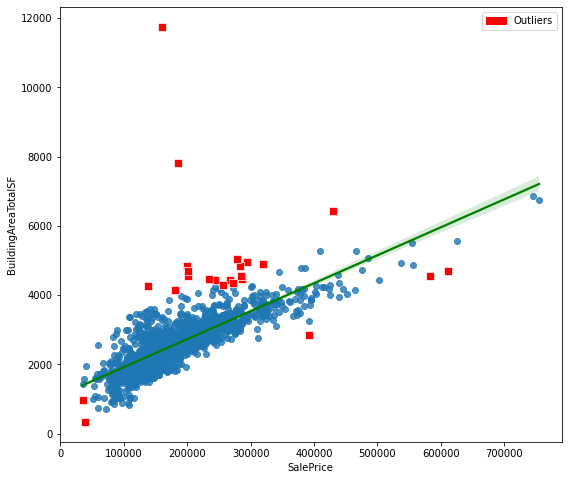

In [ ]:
# Create assist DataFrame for the outliers
outliers = df_cleansed.loc[(df_cleansed.BuildingAreaTotalSF > 6000) & (df_cleansed.SalePrice < 500000) | 
                           (df_cleansed.BuildingAreaTotalSF > 4300) & (df_cleansed.SalePrice < 330000) |
                           (df_cleansed.BuildingAreaTotalSF > 4000) & (df_cleansed.SalePrice < 200000) |
                           (df_cleansed.BuildingAreaTotalSF < 3000) & (df_cleansed.SalePrice > 380000) |
                           (df_cleansed.BuildingAreaTotalSF < 5000) & (df_cleansed.SalePrice > 570000) |
                           (df_cleansed.BuildingAreaTotalSF < 1000) & (df_cleansed.SalePrice < 50000) |
                           (df_cleansed.BuildingAreaTotalSF < 510)]

# Draw the regplot of Total Sale Price vs Building Area with the outliers

import matplotlib.patches as mpatches
plt.figure(figsize = (9, 8))

sns.regplot(x = price, y = df_cleansed['BuildingAreaTotalSF'], line_kws = {'color': 'green'}) # Plot for price vs building area
sns.scatterplot(x = price, y = outliers['BuildingAreaTotalSF'], color = 'red', marker = 's', s = 75) # Plot for outliers

red_dot = mpatches.Patch(color='red', label='Outliers')
plt.legend(handles=[red_dot])

plt.xlabel('SalePrice')
plt.ylabel('BuildingAreaTotalSF')

The red boxes shown in the plot above are the outliers.

I determine those data as the outliers based on simple visual inspection, the data located far from the regression line and lonely isolated are categorized as the outlier.



In [ ]:
# Drop the outlier rows
df_cleansed.drop(outliers.index, inplace = True)
df_cleansed.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1459
Columns: 59 entries, Id to OverallCond
dtypes: float64(2), int64(25), object(32)
memory usage: 673.1+ KB


Let's recheck the regplot of House Price to the Total Building Area after the outliers dropped.

Text(0, 0.5, 'BuildingAreaTotalSF')

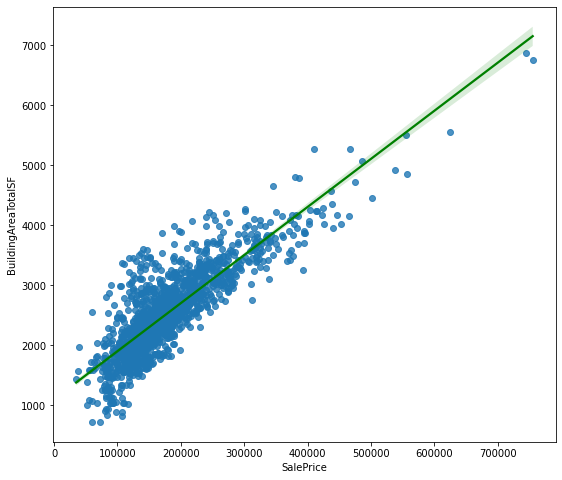

In [ ]:
# Check the comparison of relation between House Price to the Total Building Area and the Lot Area

plt.figure(figsize = (9, 8))

sns.regplot(x = df_cleansed['SalePrice'], y = df_cleansed['BuildingAreaTotalSF'], line_kws = {'color': 'green'}) # Plot for price vs building area

plt.xlabel('SalePrice')
plt.ylabel('BuildingAreaTotalSF')


The data now is already scattered near the regression line, no obvious outlier data was found, which means the House Price is positively correlated with the Total Building Area.

# 4. Saving the Cleansed Dataset

The Exploratory Data Analysis for preprocessing is now finished, the final dataset will be saved for further revision or to advance to the modeling process when I am capable to do it  later.

In [ ]:
df_cleansed.to_csv('HousePriceEDA_Bimo.csv', index=False)
from google.colab import files
files.download("HousePriceEDA_Bimo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>